In [11]:
from main import DataFramePreprocessor
dfp = DataFramePreprocessor()

In [12]:
import numpy as np
import numpy.random as random
import pandas as pd
import scipy as sp
from pandas import Series, DataFrame
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
df = dfp.df
df = df[df['element_type'] == 4]
mean_minutes = df['minutes'].mean()
df.index

Index([    0,     7,    12,    32,    38,    43,    59,    60,    75,    81,
       ...
       17621, 17625, 17628, 17656, 17660, 17661, 17665, 17684, 17689, 17692],
      dtype='int64', length=2281)

In [14]:
from sklearn import linear_model
from sklearn.metrics import r2_score

reg = linear_model.LinearRegression()
df.fillna(0, inplace=True)
var = ['minutes', 'shots', 'SoT', 'SiB', 'xG', 'npxG', 'G', 'npG',
            'key_passes', 'xA', 'A', 'xGC', 'GC', 'xCS', 'CS', 'xGI', 'npxGI', 'xP'
            , 'PvsxP', 'pos_touches', 'Att Pen',
            'carries_final_third', 'carries_penalty_area']
var = ['minutes', 'G', 'A', 'xGI', 'carries_penalty_area']
Y = df[var]
X = df['total_points'].values.reshape(-1, 1)
y = np.arange(0, len(var))

reg.fit(X, Y)

/var/folders/2l/dp_ymfg51ylbd7mxz4hb_2wh0000gn/T/ipykernel_37125/1687366269.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna(0, inplace=True)


LinearRegression()

In [15]:

for col_num in y:
    reg.fit(X, Y.iloc[:, col_num])
    print('설명변수명 : {}'.format(Y.columns[col_num]))
    print('회귀계수:', reg.coef_)
    print('절편:', reg.intercept_)
    print('결정계수 : {:.3f}'.format(reg.score(X, Y.iloc[:, col_num])))
    print('')

설명변수명 : minutes
회귀계수: [8.84289725]
절편: 11.120060331911738
결정계수 : 0.454

설명변수명 : G
회귀계수: [0.12146195]
절편: -0.05291933647518868
결정계수 : 0.772

설명변수명 : A
회귀계수: [0.02942546]
절편: -0.001976965900364183
결정계수 : 0.157

설명변수명 : xGI
회귀계수: [0.09125612]
절편: 0.01973482874165107
결정계수 : 0.558

설명변수명 : carries_penalty_area
회귀계수: [0.10699904]
절편: 0.09440452500811239
결정계수 : 0.182



In [16]:
print(df)

        id  element_type   web_name          team_name opponent_team_name  \
0        1             4    Balogun            Arsenal  Nottingham Forest   
7        8             4    G.Jesus            Arsenal  Nottingham Forest   
12      13             4    Nketiah            Arsenal  Nottingham Forest   
32      33             4     Archer        Aston Villa   Newcastle United   
38      39             4      Davis        Aston Villa   Newcastle United   
...    ...           ...        ...                ...                ...   
17661  781             4    Gardner  Nottingham Forest   Newcastle United   
17665  785             4   Marshall           West Ham            Arsenal   
17684  804             4  Enes Ünal        Bournemouth             Fulham   
17689  809             4    Ribeiro  Nottingham Forest   Newcastle United   
17692  812             4     Koumas          Liverpool            Burnley   

       was_home  now_cost  selected_by_percent  gameweek  minutes  ...   CS

In [17]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler


Y = pd.DataFrame(df, columns=['total_points'])
Y.fillna(0, inplace=True)
X = df[var]


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size= 0.5, random_state=0)

# 데이터 표준화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

full_model = sm.OLS(y_train, X_train_scaled)
fitted_full_model = full_model.fit()
fitted_full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           total_points   R-squared (uncentered):                   0.774
Model:                            OLS   Adj. R-squared (uncentered):              0.773
Method:                 Least Squares   F-statistic:                              775.8
Date:                Fri, 16 Feb 2024   Prob (F-statistic):                        0.00
Time:                        17:09:29   Log-Likelihood:                         -2014.0
No. Observations:                1140   AIC:                                      4038.
Df Residuals:                    1135   BIC:                                      4063.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.7714      0.062     12.408      0.000       0.649       0.893
x2             1.9975      0.056     35.740      0.000       1.888       2.107
x3             0.6495      0.046     14.174      0.000       0.560       0.739
x4             0.0023      0.068      0.034      0.973      -0.131       0.135
x5             0.0208      0.052      0.399      0.690      -0.081       0.123
==============================================================================
Omnibus:                      784.352   Durbin-Watson:                   0.400
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            26085.080
Skew:                           2.702   Prob(JB):                         0.00
Kurtosis:                      25.803   Cond. No.                         3.27
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

scaled_df = df[var]
scaled_df[var] = scaler.fit_transform(df[var])

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(scaled_df.values, i) for i in range(scaled_df.shape[1])]
vif['features'] = scaled_df.columns
vif

/var/folders/2l/dp_ymfg51ylbd7mxz4hb_2wh0000gn/T/ipykernel_37125/3579230553.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scaled_df[var] = scaler.fit_transform(df[var])


,VIF Factor,features
0,1.978728,minutes
1,1.764918,G
2,1.228985,A
3,2.650091,xGI
4,1.465429,carries_penalty_area


In [19]:
X2 = pd.DataFrame(scaled_df, columns = var)

X2.corr()

,minutes,G,A,xGI,carries_penalty_area
minutes,1.000000,0.418880,0.275973,0.631388,0.551251
G,0.418880,1.000000,0.103544,0.639508,0.277864
A,0.275973,0.103544,1.000000,0.384243,0.221719
xGI,0.631388,0.639508,0.384243,1.000000,0.432405
carries_penalty_area,0.551251,0.277864,0.221719,0.432405,1.000000


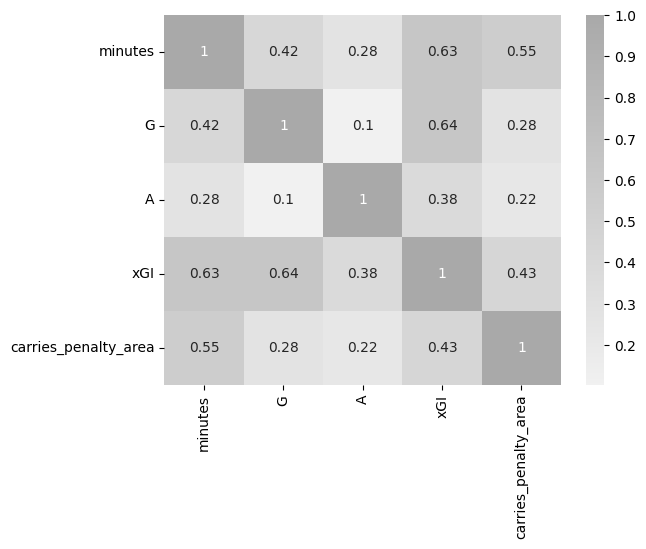

In [20]:
cmap = sns.light_palette('darkgray', as_cmap=True)
sns.heatmap(X2.corr(), annot=True, cmap=cmap)
plt.show()